<a href="https://colab.research.google.com/github/kavyajeetbora/EAST/blob/master/EAST_resnet_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Imports

[**Tasks - Incidental Scene Text**](https://rrc.cvc.uab.es/?ch=4&com=tasks)

In [1]:
!pip install lanms

     |████████████████████████████████| 983kB 4.8MB/s 
  Created wheel for lanms: filename=lanms-1.0.2-cp36-cp36m-linux_x86_64.whl size=858399 sha256=fa51249f1761005b173fd1755012d8f059633e5c3514d98c5c3a53d41d442145
  Stored in directory: /root/.cache/pip/wheels/67/2d/7f/e554332de560b592612ba9e5711535d22b6ebd469295a50049
Successfully built lanms


In [0]:
import os
from PIL import Image
from torch.utils.model_zoo import load_url
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
import lanms

In [3]:
%%time

!git clone -l -s git://github.com/kavyajeetbora/EAST.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 207 (delta 3), reused 0 (delta 0), pack-reused 199
Receiving objects: 100% (207/207), 11.01 MiB | 16.73 MiB/s, done.
Resolving deltas: 100% (118/118), done.
/content/cloned-repo
dataset.py		    EAST_resnet.py		model.py
detect.py		    EAST_resnet_training.ipynb	model_resnet.py
dsiplay_ground_truth.ipynb  EAST_training.ipynb		train.py
EAST_detection.ipynb	    loss.py
CPU times: user 66.5 ms, sys: 17.9 ms, total: 84.4 ms
Wall time: 8.27 s


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
from dataset import custom_dataset

# AI4Bharat dataset
image_address = '/content/drive/My Drive/Colab Notebooks/padh.ai.notebooks/15. Object Detection/AI4Bharat Dataset/Test Set/Images'
label_address = '/content/drive/My Drive/Colab Notebooks/padh.ai.notebooks/15. Object Detection/AI4Bharat Dataset/Test Set/Annotations'
model_path = '/content/drive/My Drive/Colab Notebooks/padh.ai.notebooks/15. Object Detection/EAST scene text detector/EAST_resnet_50.pth'

training_dataset = custom_dataset(image_address, label_address)
print(len(training_dataset))

428


## Detecting

In [6]:
from EAST_resnet import East
# set up the pretrained model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = East().to(device)
model.load_state_dict(torch.load(model_path))
model.eval()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 215MB/s]


East(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0):

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


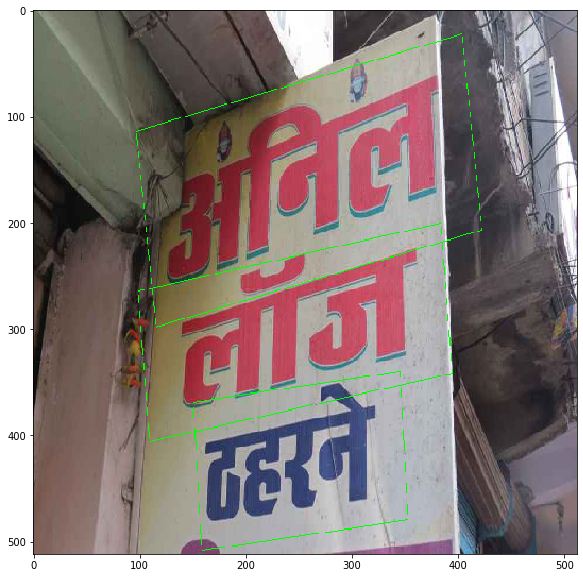

In [7]:
from detect import *
index = np.random.choice(len(training_dataset))
plt.figure(figsize=(15,10))
# displaying the detected boxes
img_files = os.listdir(image_address)
image_path = os.path.join(image_address,img_files[index])
img = Image.open(image_path)
boxes = detect(img, model, device)
detected_img = plot_boxes(img, boxes)
plt.imshow(detected_img.resize((512,512)))
plt.show()

## Test image from google

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


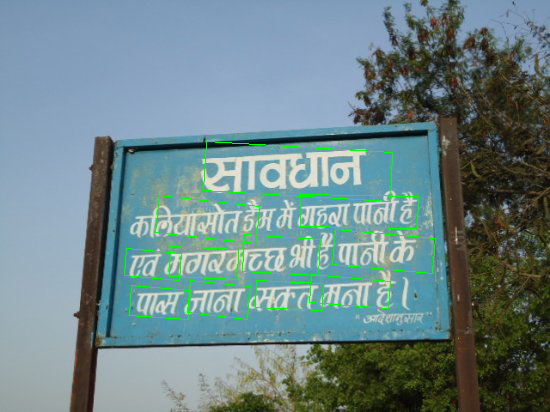

In [8]:
test_image_folder = '/content/drive/My Drive/Colab Notebooks/padh.ai.notebooks/15. Object Detection/EAST scene text detector/Test Images'

img = Image.open(test_image_folder+'/signboard.jpg')
boxes = detect(img, model, device)
plot_boxes(img, boxes)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


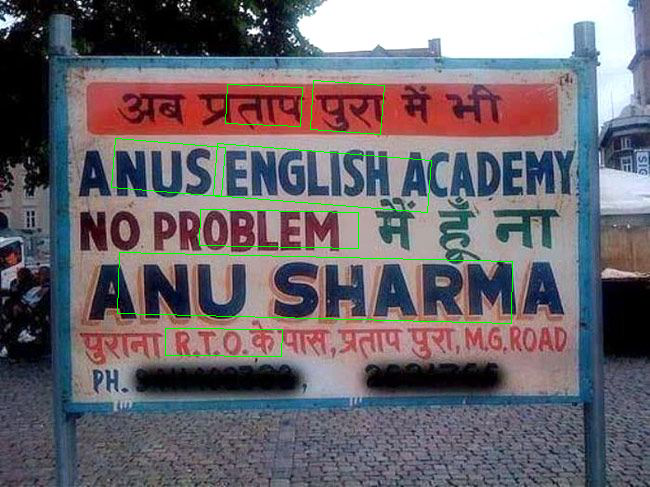

In [9]:
img = Image.open(test_image_folder+'/signboard2.jpg')
boxes = detect(img, model, device)
plot_boxes(img, boxes)

In [0]:
img = Image.open(test_image_folder+'/sector37_1.jpg')
img = img.resize(size=(256,256))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


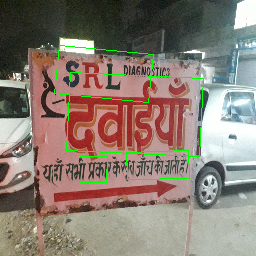

<Figure size 1080x720 with 0 Axes>

In [11]:
boxes = detect(img, model, device)
plt.figure(figsize=(15,10))
plot_boxes(img, boxes)

In [0]:
img = Image.open(test_image_folder+'/sector37_2.jpg')
img = img.resize(size=(256,256))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


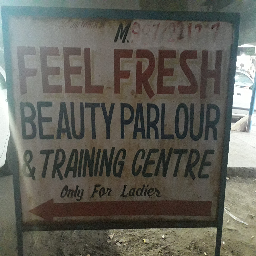

<Figure size 1080x720 with 0 Axes>

In [14]:
boxes = detect(img, model, device)
plt.figure(figsize=(15,10))
plot_boxes(img, boxes)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


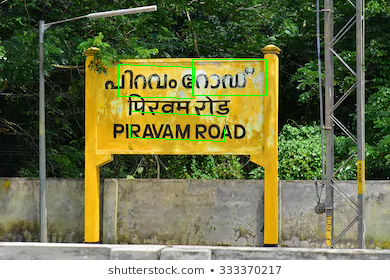

<Figure size 1080x720 with 0 Axes>

In [15]:
img = Image.open(test_image_folder+'/1.jpg')
boxes = detect(img, model, device)
plt.figure(figsize=(15,10))
plot_boxes(img, boxes)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


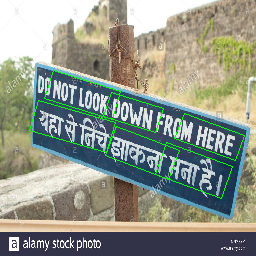

<Figure size 1080x720 with 0 Axes>

In [16]:
img = Image.open(test_image_folder+'/2.jpg')
img = img.resize(size=(256,256))
boxes = detect(img, model, device)
plt.figure(figsize=(15,10))
plot_boxes(img, boxes)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


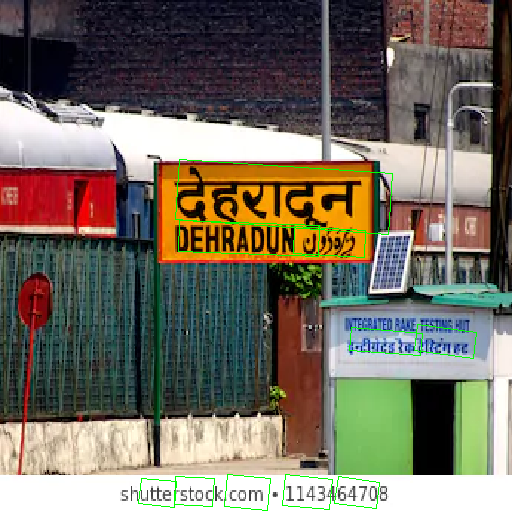

<Figure size 1080x720 with 0 Axes>

In [17]:
img = Image.open(test_image_folder+'/3.jpg')
img = img.resize(size=(512,512))
boxes = detect(img, model, device)
plt.figure(figsize=(15,10))
plot_boxes(img, boxes)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


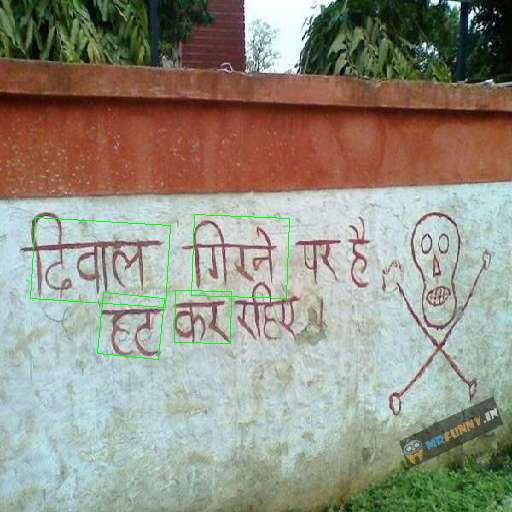

<Figure size 1080x720 with 0 Axes>

In [18]:
img = Image.open(test_image_folder+'/4.jpg')
img = img.resize(size=(512,512))
boxes = detect(img, model, device)
plt.figure(figsize=(15,10))
plot_boxes(img, boxes)

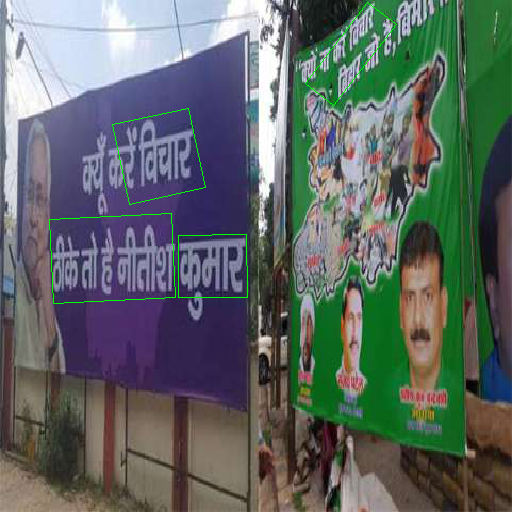

<Figure size 1080x720 with 0 Axes>

In [0]:
img = Image.open(test_image_folder+'/5.jpg')
img = img.resize(size=(512,512))
boxes = detect(img, model, device)
plt.figure(figsize=(15,10))
plot_boxes(img, boxes)